# Mall Customer Segmentation
#### For this project we will attempt to use Clustering Algorithms to perform  customer segmentation for the mall customer.
#### This data set contains the following features:
> - CustomerID : Unique ID assigned to the customer.
- Gender : Gender of the customer.
- Annual Income (k$) : Annual Income of the customer.
- Spending Score (1-100) : Score assigned by the mall based on customer behavior and spending nature

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.style.use('fivethirtyeight')
np.random.seed(5)

# Gathering Data

In [2]:
df = pd.read_csv(r'Downloads\Cat\Mall_Customers.csv')

# Assess Data

In [3]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#check for missing data
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#check for duplicates
df.duplicated().sum()

0

In [8]:
#statistical summary about the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [9]:
df.drop('CustomerID',axis=1,inplace=True)

In [10]:
#showing the columns name and position
for i,col in enumerate(df.columns):
    print(i,col)

0 Gender
1 Age
2 Annual Income (k$)
3 Spending Score (1-100)


# EDA

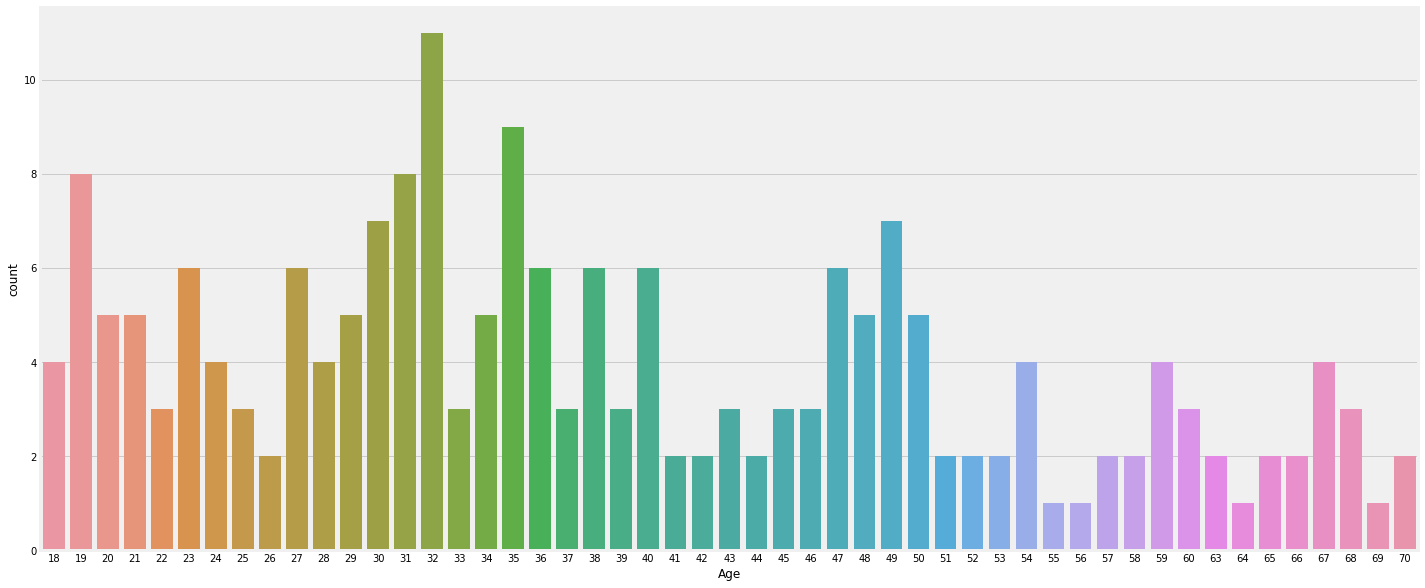

In [11]:
plt.figure(figsize=(22,10))
sns.countplot(df.Age)
plt.show()

***The above plot showing the distrbution of customer ages which clear that most of customer are under 50 and the most common age is 32***

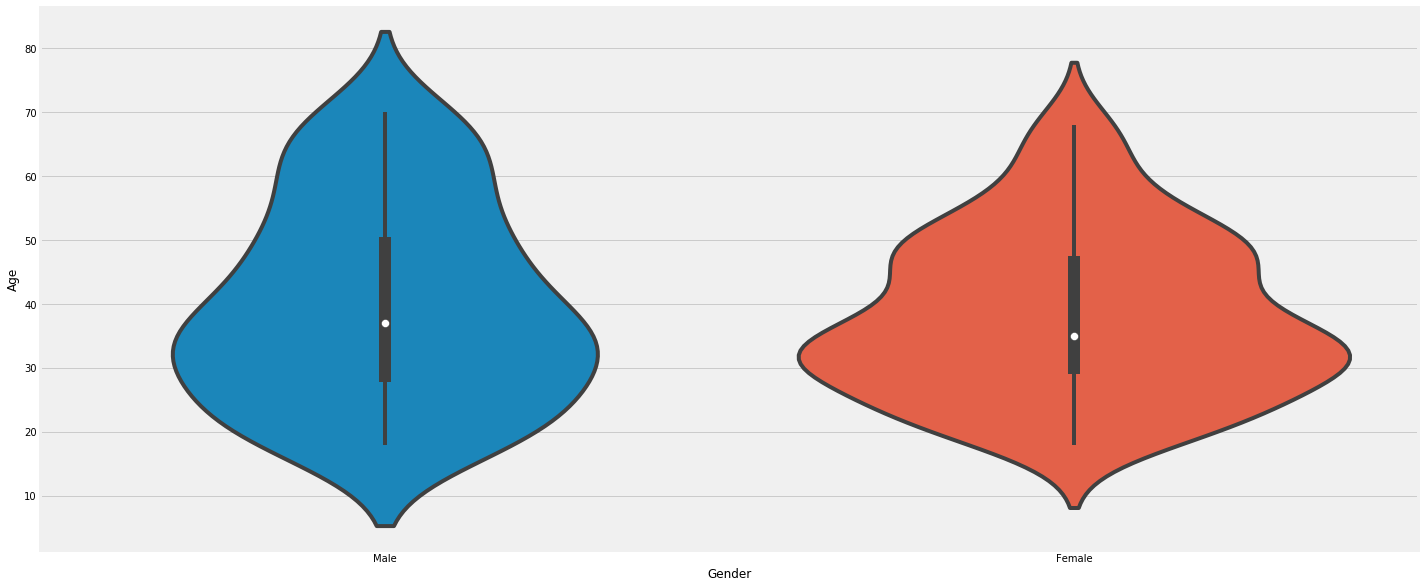

In [12]:
plt.figure(figsize=(22,10))
sns.violinplot(y=df['Age'],x=df['Gender'])
plt.show()

***The above plot showing the distrbution of customer ages for each gender and it show that the mean age for both customer male and female are between 30 and 40***

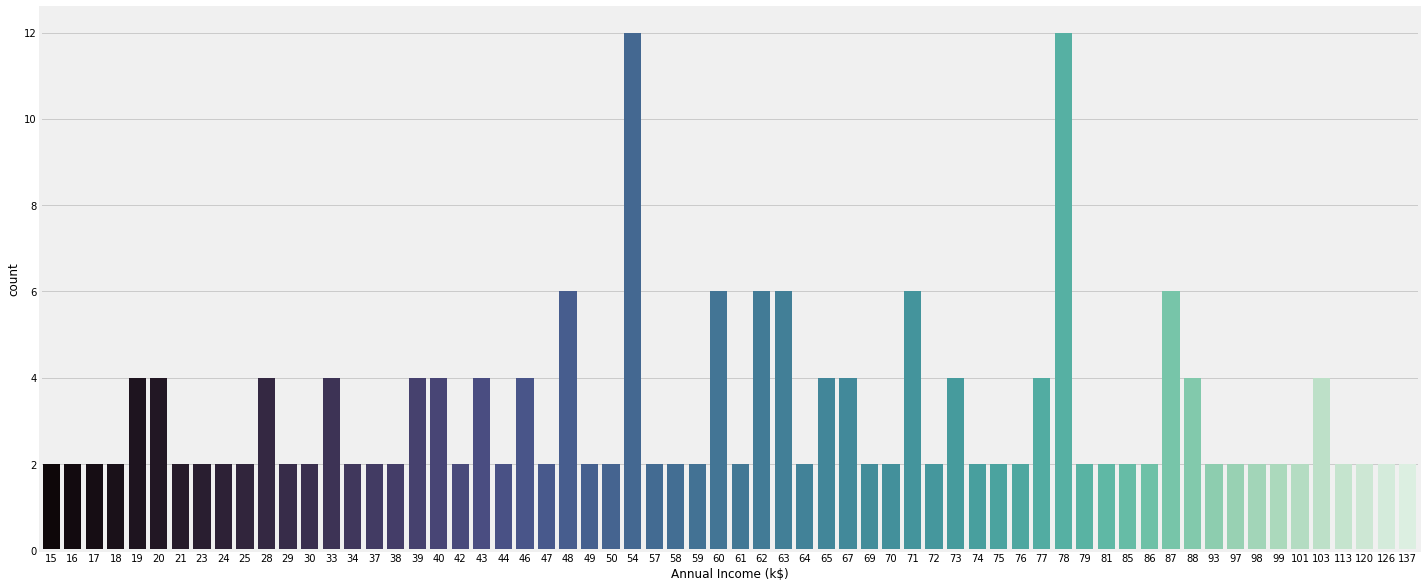

In [13]:
plt.figure(figsize=(22,10))
sns.countplot(df['Annual Income (k$)'],palette='mako')
plt.show()

***The above plot showing the distrbution of customer annual income which show that most common income are between 54 and 88 while a few are less and more than it***

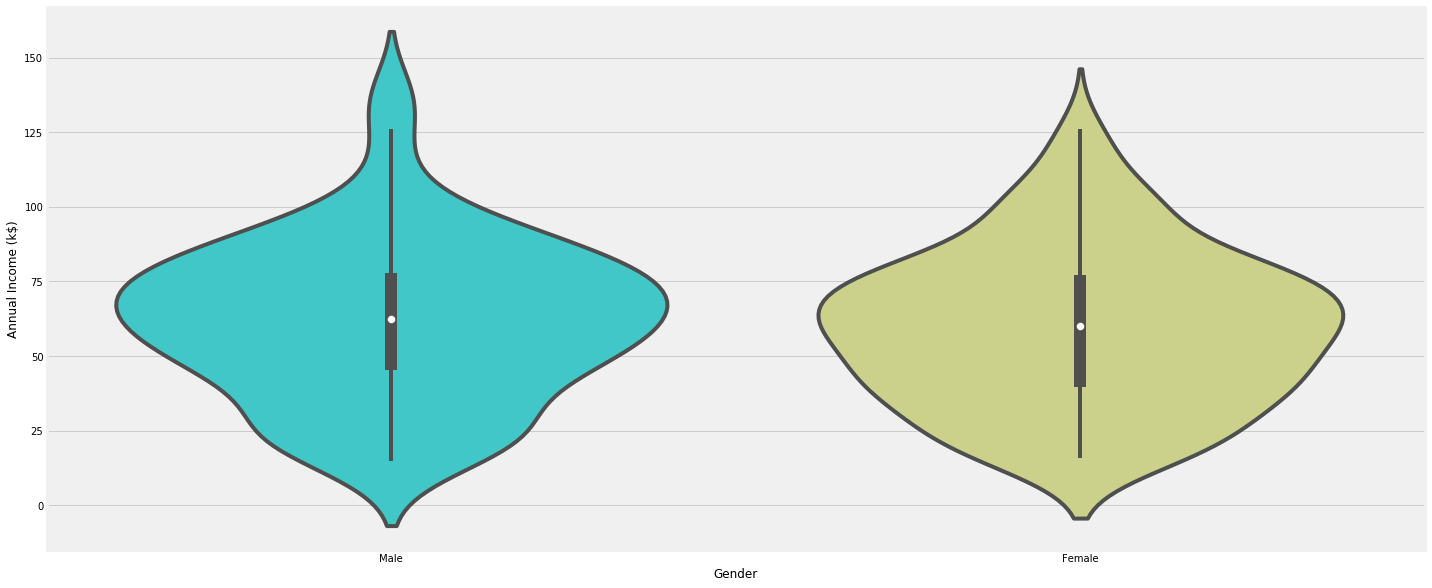

In [14]:
plt.figure(figsize=(22,10))
sns.violinplot(y=df['Annual Income (k$)'],x=df['Gender'],palette='rainbow')
plt.show()

***The above plot showing the distrbution of customer annual income for each gender and it show that the annual income for male are greater than female***

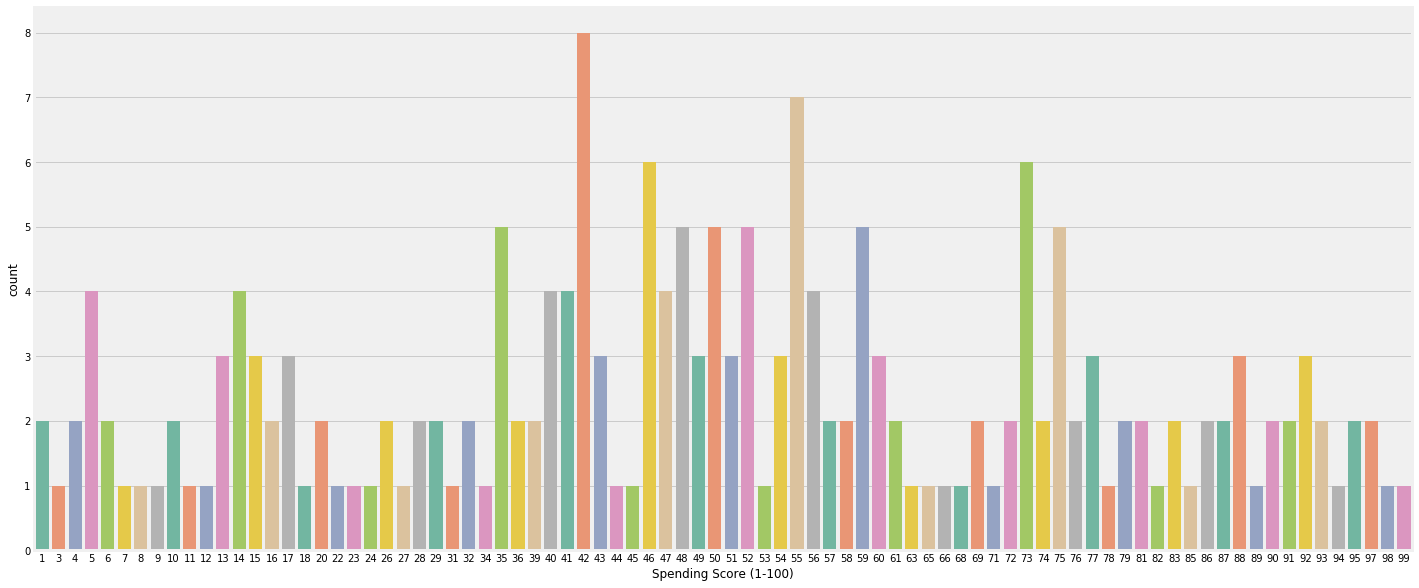

In [15]:
plt.figure(figsize=(22,10))
sns.countplot(df['Spending Score (1-100)'],palette='Set2')
plt.show()

***The above plot showing the distrbution of customer spending score which show that most common score are between 35 and 75 while a few are less and more than it***

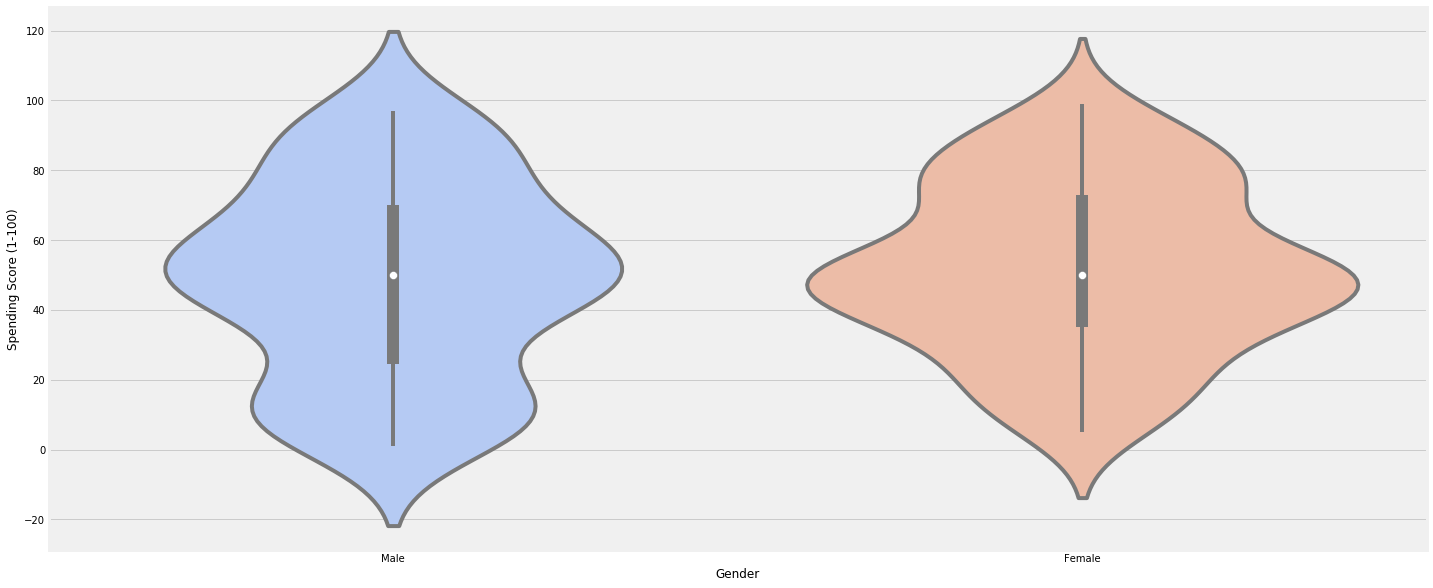

In [16]:
plt.figure(figsize=(22,10))
sns.violinplot(y=df['Spending Score (1-100)'],x=df['Gender'],palette='coolwarm')
plt.show()

***The above plot showing the distrbution of spending score  for each gender and it show that number of female which had score greater than 40 are more than male which had score greater than 40***

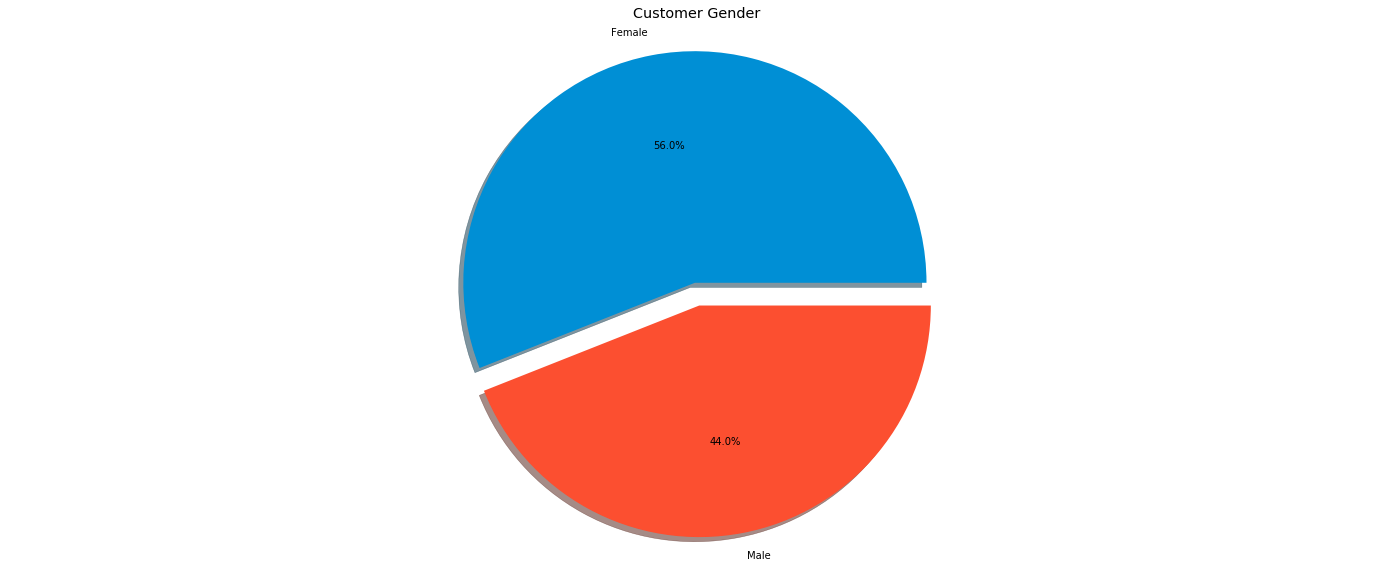

In [17]:
plt.figure(figsize=(22,10))
label=df.Gender.value_counts().index
plt.pie(df.Gender.value_counts(),explode=[0.05]*len(label),labels=label,autopct='%.1f%%',shadow=True)
plt.axis('equal')
plt.title('Customer Gender')
plt.show()

***The Chart show that number of female customer are greater than male customer***

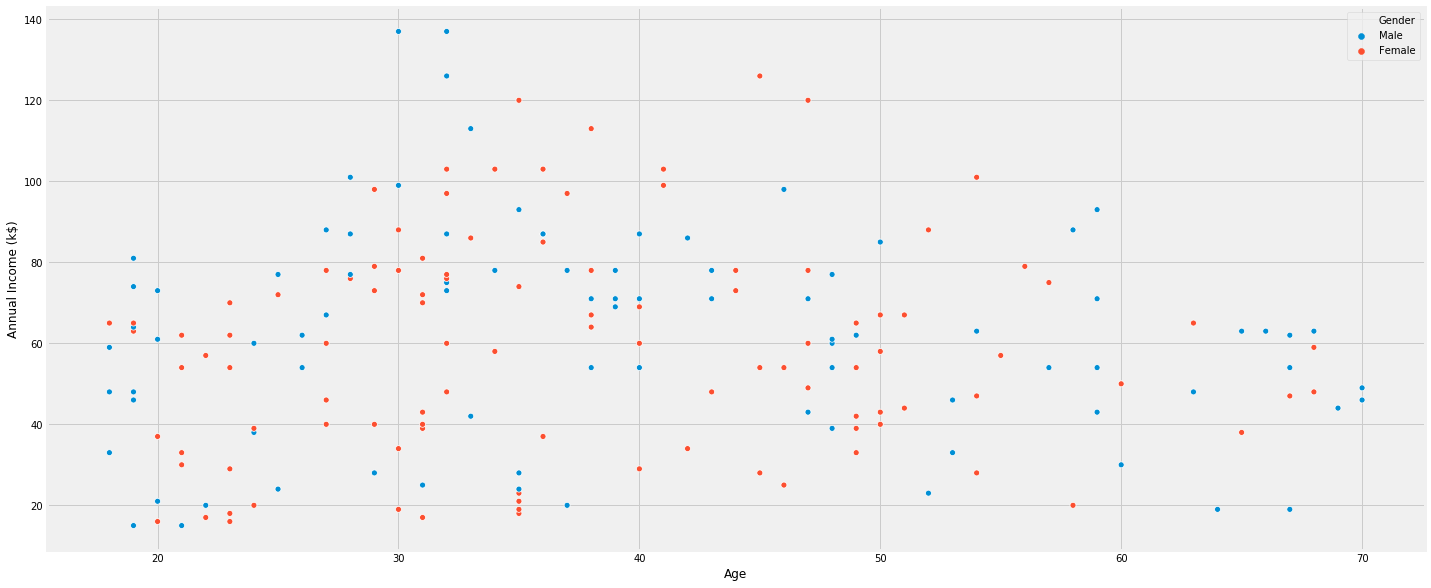

In [18]:
plt.figure(figsize=(22,10))
sns.scatterplot(df['Age'],df['Annual Income (k$)'],hue=df.Gender)
plt.legend()
plt.show()

***The above Distribution show that young customer earn money more than old customer and that for both gender*** 

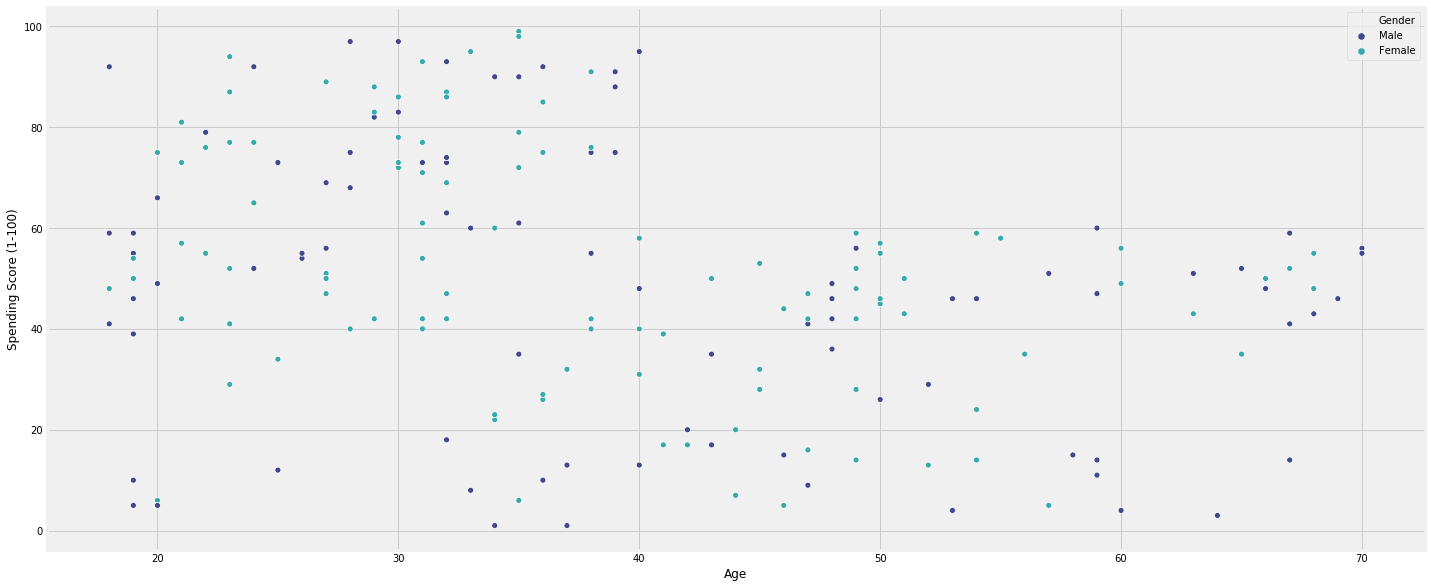

In [19]:
plt.figure(figsize=(22,10))
sns.scatterplot(df['Age'],df['Spending Score (1-100)'],hue=df.Gender,palette='mako')
plt.legend()
plt.show()

***The above Distribution show that young customer had score more than old customer and that for both gender*** 

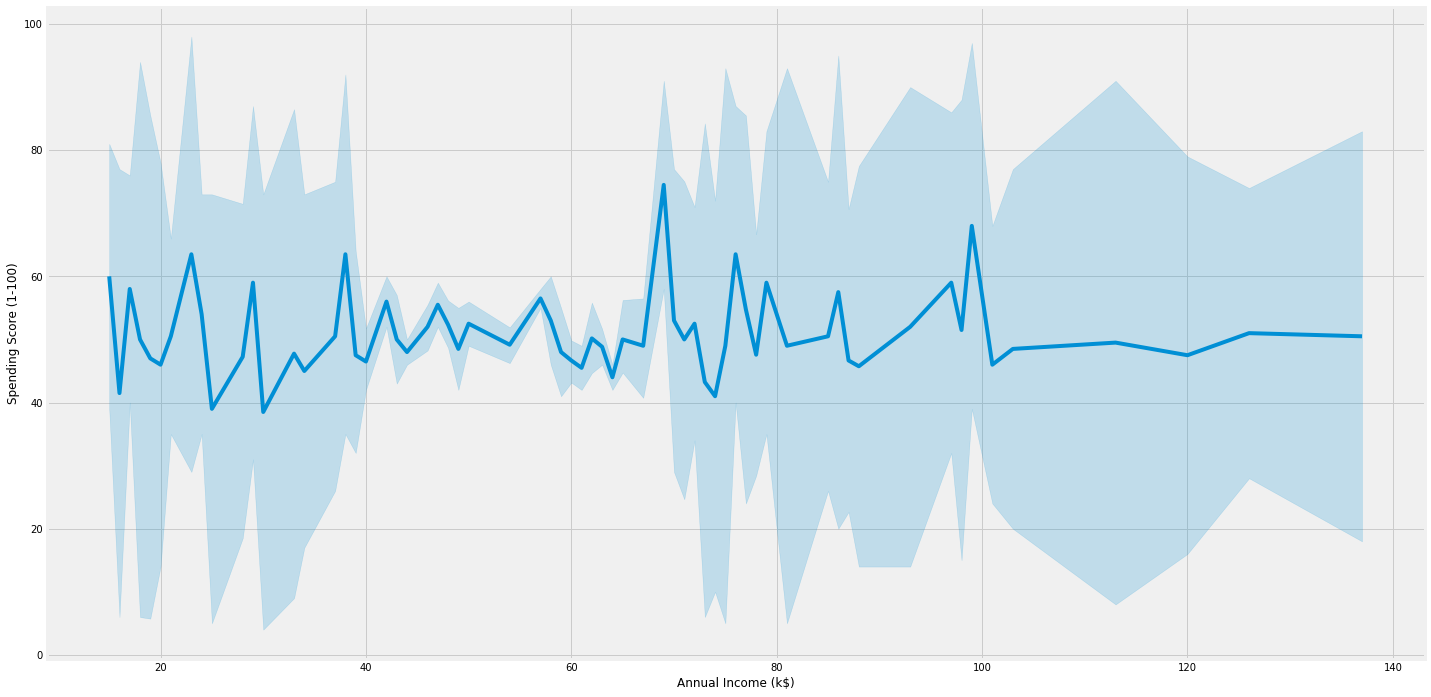

In [20]:
plt.figure(figsize=(22,12))
sns.lineplot(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

***The above plot show the relation between customer annual income and customer spending score***

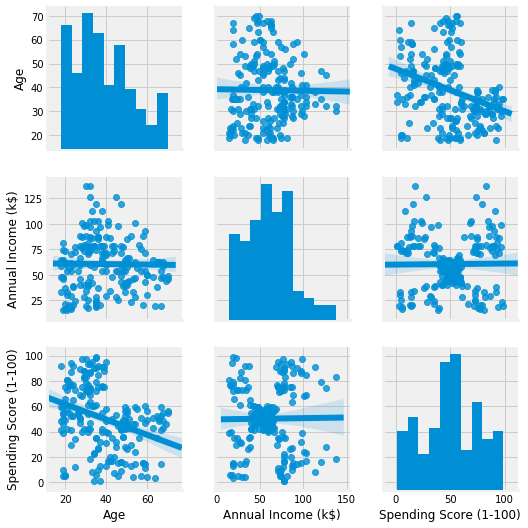

In [21]:
sns.pairplot(df,kind='reg')

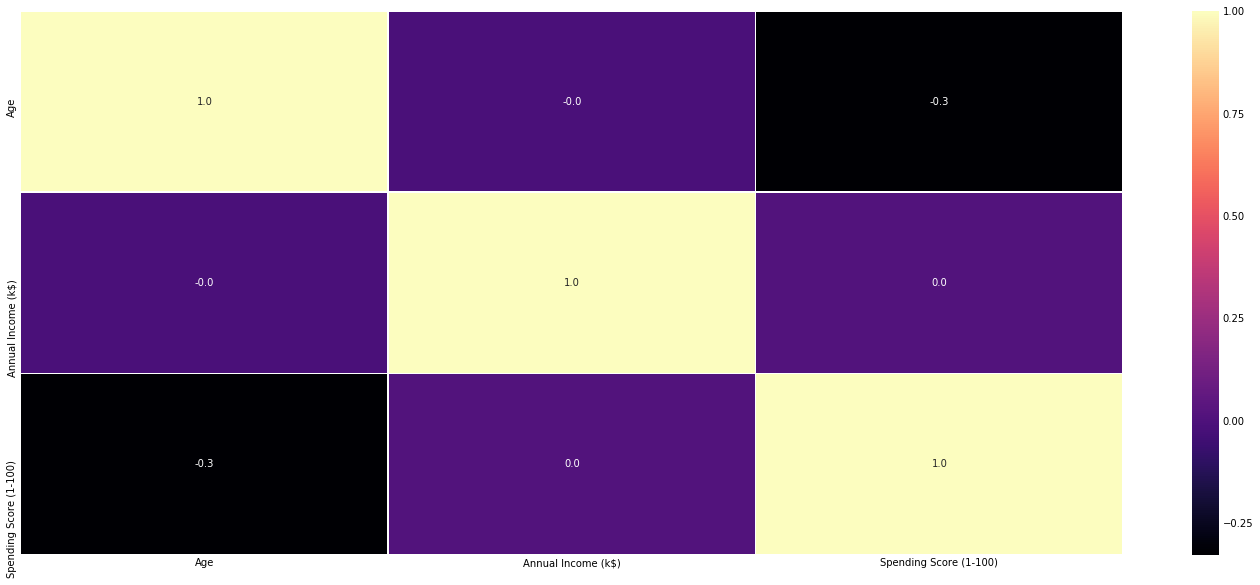

In [22]:
#heatmap for corr between feature
plt.figure(figsize=(22, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',cmap='magma')
plt.show()

## K Means Cluster Model

In [23]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

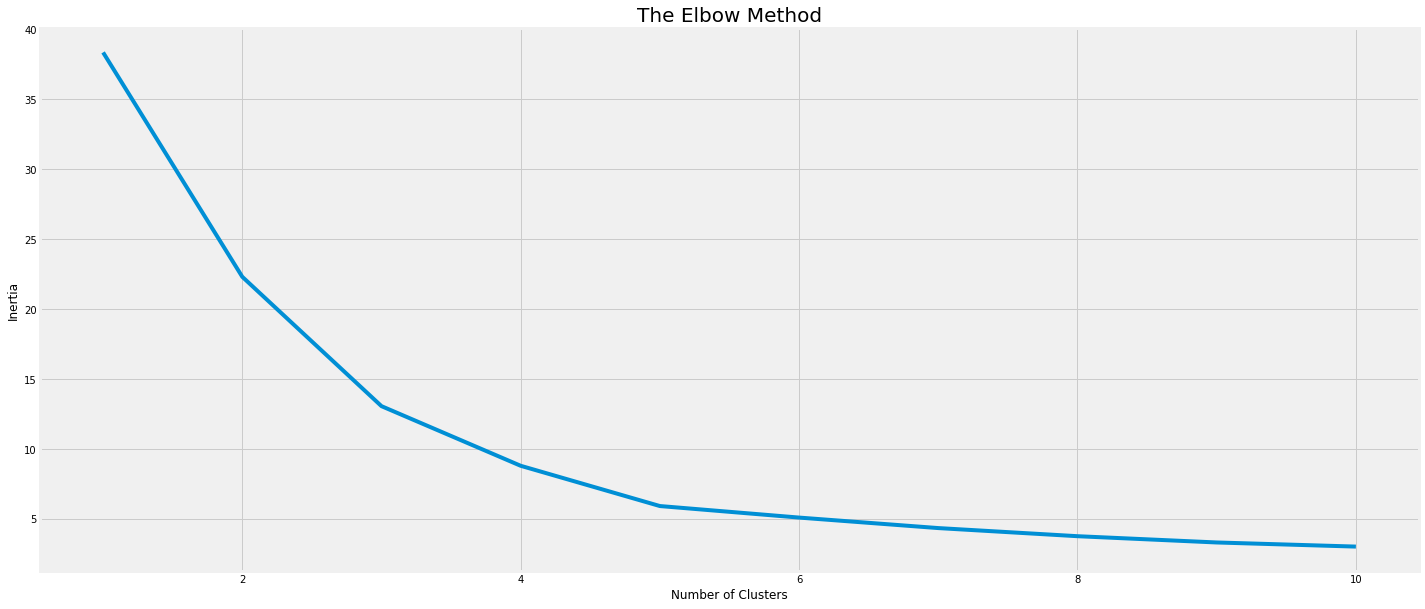

In [24]:
#choosing the best number of cluster by elbow method
x = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    pipeline = make_pipeline(OrdinalEncoder(),Normalizer(), km)
    pipeline.fit(df)
    x.append(km.inertia_)
plt.figure(figsize=(22,10))    
plt.plot(range(1, 11), x)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

***The best number of cluster is 5***

In [25]:
#create a kmeans model with 5 clusters
km = KMeans(n_clusters=5)
pipeline = make_pipeline(OrdinalEncoder(),Normalizer(), km)
labels = pipeline.fit_predict(df)

# t-SNE
***using t-SNE model to plot the data into 2D***

In [26]:
from sklearn.manifold import TSNE

In [27]:
tsne = TSNE(n_components=2)

In [28]:
tsne_pip = make_pipeline(OrdinalEncoder(),Normalizer(), tsne)

In [29]:
trans = tsne_pip.fit_transform(df)

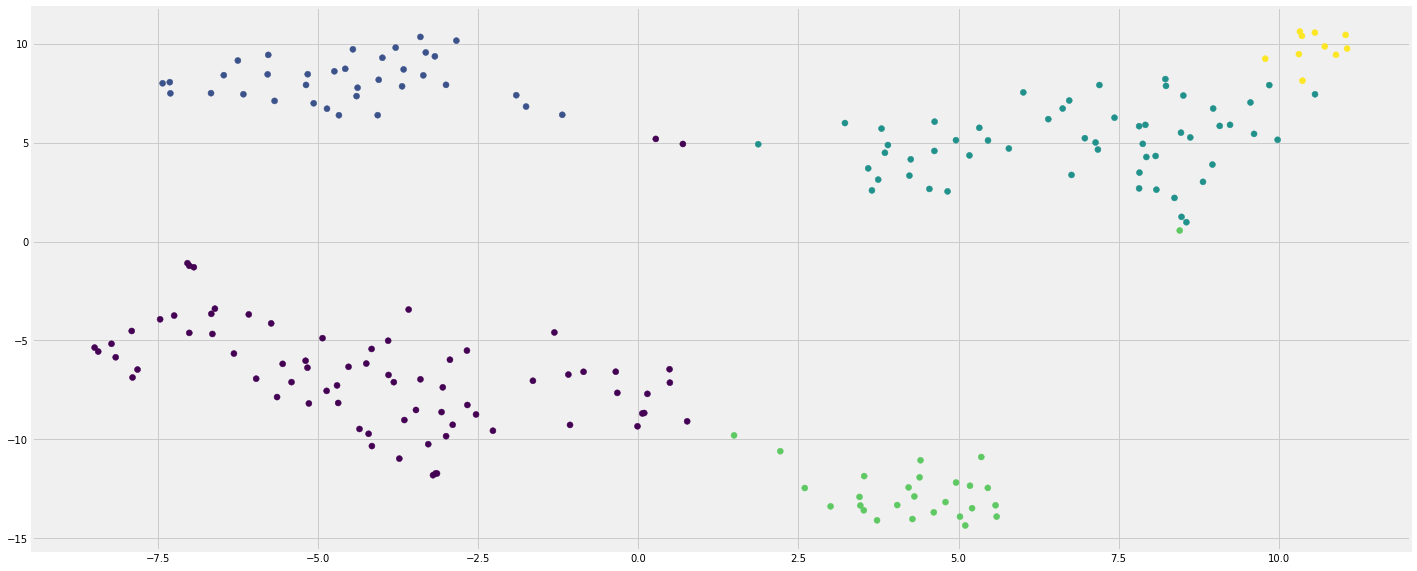

In [30]:
xs = trans[:,0]
ys = trans[:,1]
plt.figure(figsize=(22,10))
plt.scatter(xs,ys,c=labels)
plt.show()

***This plot show the data into 2D and show the 5 clusters of the data***

# Hierarchical clustering 

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [32]:
hier_pip = make_pipeline(OrdinalEncoder(),Normalizer())
df_hier = hier_pip.fit_transform(df)

In [33]:
link = linkage(df_hier,method='complete')

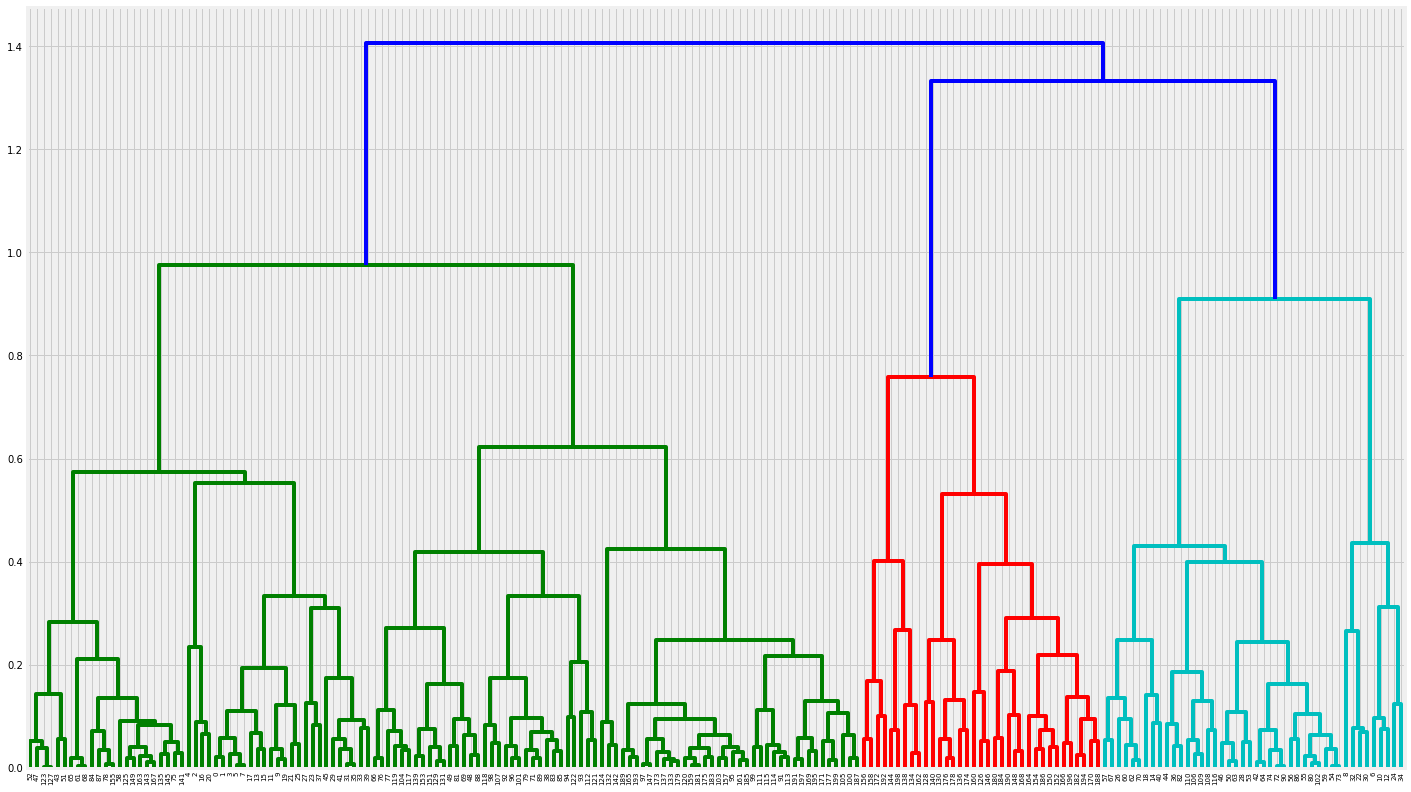

In [34]:
plt.figure(figsize=(22,14))
dendrogram(link,
           leaf_rotation=90,
           leaf_font_size=7,
)
plt.show()